In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv("../input/heart.csv")

In [2]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None
              age         sex     ...            thal      target
count  303.000000  303.000000     ...      303.000000  303.000000
mean    54.366337    0.683168     ...        2.313531    0.544554
std      9.082101    0.466011     ...        0.612277    0.498835
min     29.000000    0.000000     ...        0.000000    0.000000
25%     47.500000    0.000000     ...        2.000000    0.000000
50%   

In [3]:
data.shape

(303, 14)

In [4]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

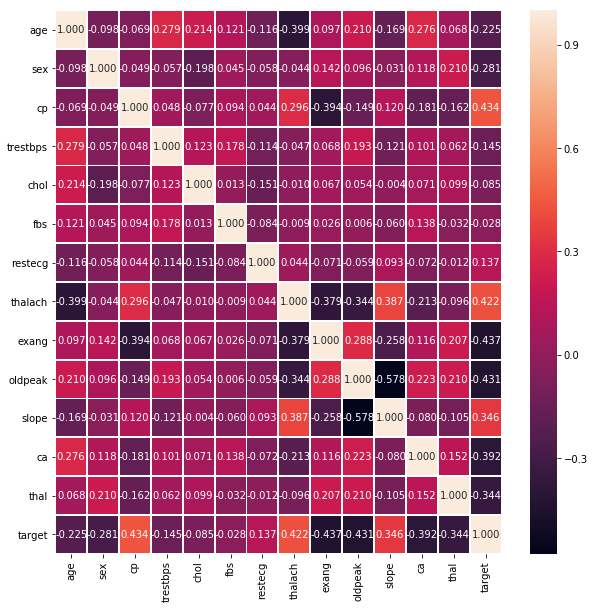

In [6]:

a,b = plt.subplots(figsize=(10,10))# figsize meaning is determine size of shape
sns.heatmap(data.corr(),annot=True,linewidths=0.9,fmt='.3f',ax=b) 
plt.show()

In [7]:
data.head(100).loc[20:25,["slope","oldpeak","target","cp"]]


,slope,oldpeak,target,cp
20,1,0.5,1,0
21,2,0.4,1,2
22,2,0.0,1,0
23,1,1.0,1,2
24,2,1.4,1,3
25,2,0.4,1,1


In [8]:
new = pd.concat([data.tail(5).loc[::-1,["slope","oldpeak","target","cp"]],data.head(5).loc[::-1,["slope","oldpeak","target","cp"]]],axis = 0)
print(new)


     slope  oldpeak  target  cp
302      1      0.0       0   1
301      1      1.2       0   0
300      1      3.4       0   0
299      1      1.2       0   3
298      1      0.2       0   0
4        2      0.6       1   0
3        2      0.8       1   1
2        2      1.4       1   1
1        0      3.5       1   2
0        0      2.3       1   3


In [9]:
new["loop"]=["tr_" if ((oldpeak >0.8) & (slope == 1)) else "fal_" for slope,oldpeak,target,cp in new.values]
   

In [10]:
print(new)

     slope  oldpeak  target  cp  loop
302      1      0.0       0   1  fal_
301      1      1.2       0   0   tr_
300      1      3.4       0   0   tr_
299      1      1.2       0   3   tr_
298      1      0.2       0   0  fal_
4        2      0.6       1   0  fal_
3        2      0.8       1   1  fal_
2        2      1.4       1   1  fal_
1        0      3.5       1   2  fal_
0        0      2.3       1   3  fal_


In [11]:
new.drop(["loop"],axis=1,inplace = True)

In [12]:
print(new)

     slope  oldpeak  target  cp
302      1      0.0       0   1
301      1      1.2       0   0
300      1      3.4       0   0
299      1      1.2       0   3
298      1      0.2       0   0
4        2      0.6       1   0
3        2      0.8       1   1
2        2      1.4       1   1
1        0      3.5       1   2
0        0      2.3       1   3


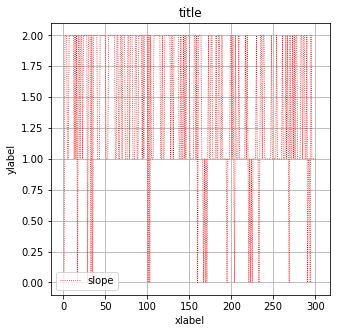

In [13]:
data.slope.plot(kind='line',color='r',label='slope',grid=True,alpha=1,figsize=(5,5),linewidth=0.8,linestyle=':')
plt.legend(loc='lower left')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
plt.show()

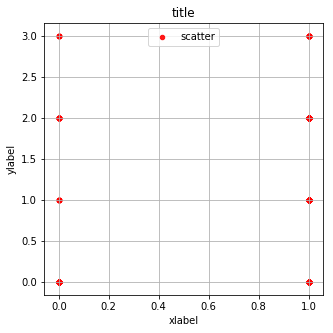

In [14]:
data.plot(kind='scatter',color='r',label='scatter',grid=True,alpha=0.9,figsize=(5,5),x='target',y='cp')
plt.legend(loc='upper center')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
plt.show()

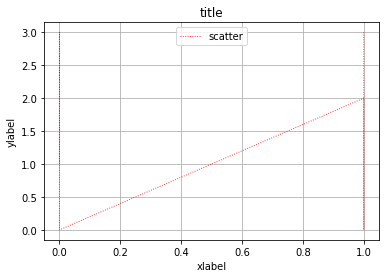

In [15]:
data.plot(kind='line',color='r',label='scatter',grid=True,alpha=0.9,x='target',y='cp',linewidth=0.9,linestyle=':')
plt.legend(loc='upper center')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
plt.show()

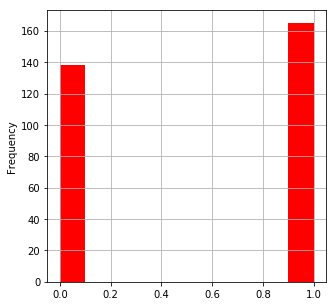

In [16]:
data.target.plot(kind='hist',color='r',label='hist',grid=True,alpha=1,figsize=(5,5),bins=10)

In [17]:
#Dictionary

dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [18]:
dictionary['spain']='london'
print(dictionary)

{'spain': 'london', 'usa': 'vegas'}


In [19]:
dictionary['france']="paris"
print(dictionary)

{'spain': 'london', 'usa': 'vegas', 'france': 'paris'}


In [20]:
del dictionary['spain']
print(dictionary)

{'usa': 'vegas', 'france': 'paris'}


In [21]:
print('france' in dictionary) 
print(dictionary)

True
{'usa': 'vegas', 'france': 'paris'}


In [22]:
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{}


In [23]:
variable_1=data['target']
print(type(variable_1))
variable_2=data[['target']]
print(type(variable_2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
print(variable_2)

     target
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
..      ...
273       0
274       0
275       0
276       0
277       0
278       0
279       0
280       0
281       0
282       0
283       0
284       0
285       0
286       0
287       0
288       0
289       0
290       0
291       0
292       0
293       0
294       0
295       0
296       0
297       0
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]


In [25]:
x=variable_2['target']>0
print(x)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool


In [26]:
print(variable_2[x])

     target
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
..      ...
135       1
136       1
137       1
138       1
139       1
140       1
141       1
142       1
143       1
144       1
145       1
146       1
147       1
148       1
149       1
150       1
151       1
152       1
153       1
154       1
155       1
156       1
157       1
158       1
159       1
160       1
161       1
162       1
163       1
164       1

[165 rows x 1 columns]


In [27]:
data[(data['target']>0) & (data['cp']>2)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1


In [28]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [29]:
i=0
while i!=5:
    print('i is = ',i)
    i+=1
print('i is equal', i)
    

i is =  0
i is =  1
i is =  2
i is =  3
i is =  4
i is equal 5


In [30]:
lis = [1,2,3,4,5]
for y in lis:
    print('i is: ',i)
print('')

dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

for index,value in data.loc[0:3,['cp']].iterrows(): 
    print('index = ',index,' value = ',value)

i is:  5
i is:  5
i is:  5
i is:  5
i is:  5

spain  :  madrid
france  :  paris

index =  0  value =  cp    3
Name: 0, dtype: int64
index =  1  value =  cp    2
Name: 1, dtype: int64
index =  2  value =  cp    1
Name: 2, dtype: int64
index =  3  value =  cp    1
Name: 3, dtype: int64


1 2 3


2
3


[1, 4, 9]
[1, 4, 9]
0     30
1     32
2     34
3     66
4     90
5    132
Name: apply_metodu, dtype: int64


2    166
3    117
1     18
0      2
Name: thal, dtype: int64


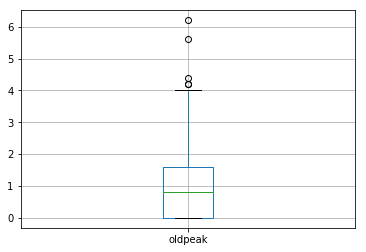

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

    slope  oldpeak  target  cp
20      1      0.5       1   0
21      2      0.4       1   2
22      2      0.0       1   0
23      1      1.0       1   2
24      2      1.4       1   3
25      2      0.4       1   1


,slope,variable,value
0,1,oldpeak,0.5
1,2,oldpeak,0.4
2,2,oldpeak,0.0
3,1,oldpeak,1.0
4,2,oldpeak,1.4
5,2,oldpeak,0.4
6,1,target,1.0
7,2,target,1.0
8,2,target,1.0
9,1,target,1.0


array([10.        , 12.10526316, 14.21052632, 16.31578947, 18.42105263,
       20.52631579, 22.63157895, 24.73684211, 26.84210526, 28.94736842,
       31.05263158, 33.15789474, 35.26315789, 37.36842105, 39.47368421,
       41.57894737, 43.68421053, 45.78947368, 47.89473684, 50.        ])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
6,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
7,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
8,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
9,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


,oldpeak,trestbps
0,2.3,145
1,3.5,130
2,1.4,130
3,0.8,120
4,0.6,120


In [41]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

age         category
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope        float64
ca             int64
thal           int64
target         int64
dtype: object

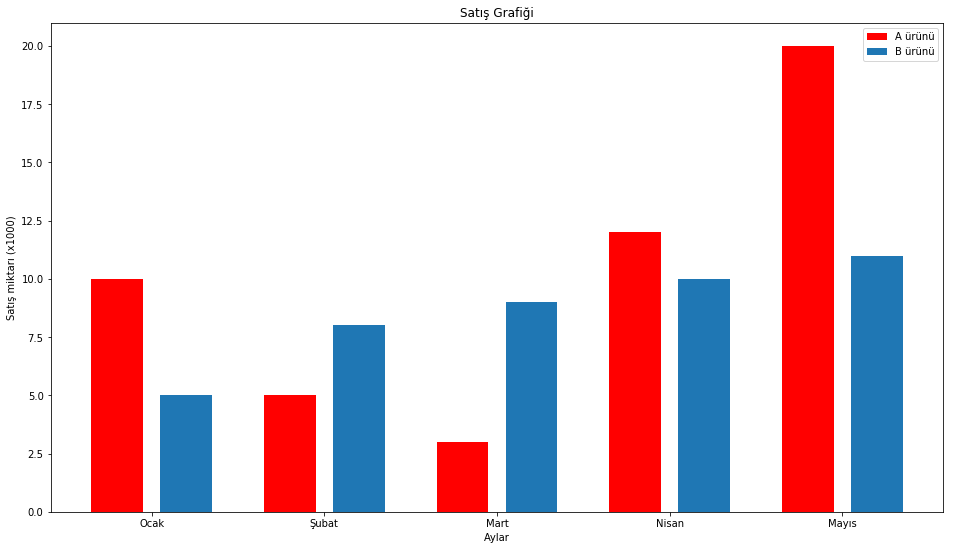

array([0, 1, 2, 3, 4])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null category
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: category(1), float64(2), int64(11)
memory usage: 32.7 KB
